**Принятие решений в бизнесе на основе данных**

**Цель:** 
1. Приоритизировать гипотезы по увеличению выручки интернет-магазина, разработанные с отделом маркетинга
2. Запустить A/B-тест и проанализировать результаты


**Предмет исследования:**

*Данные для первой части*

Файл /datasets/hypothesis.csv

*Описание данных*
Hypothesis — краткое описание гипотезы;                                                                           
Reach — охват пользователей по 10-балльной шкале;                                                                  
Impact — влияние на пользователей по 10-балльной шкале;                                                             
Confidence — уверенность в гипотезе по 10-балльной шкале;                                                          
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.  

*Данные для второй части*

Файл /datasets/orders.csv

*Описание данных*                                                                                                  
transactionId — идентификатор заказа;                                                                              
visitorId — идентификатор пользователя, совершившего заказ;                                                        
date — дата, когда был совершён заказ;                                                                             
revenue — выручка заказа;                                                                                          
group — группа A/B-теста, в которую попал заказ.                                                                   


Файл /datasets/visitors.csv

*Описание данных*                                                                                                  
date — дата;                                                                                                       
group — группа A/B-теста;                                                                                          
visitors — количество пользователей в указанную дату в указанной группе A/B-теста

<a id = 'section1'></a>

**Оглавление**
<a class="ancor" id="step_0"></a>

* [1 Приоритизация гипотез](#step_1)

* [2  Анализ A/B-теста](#step_2)

 * [2.1  Подготовка данных](#step_3)
 
 * [2.2  Анализ кумулятивных метрик](#step_4)
  * [2.2.1  Расчет кумулятивных метрик](#step_5)
  * [2.2.2  График кумулятивной выручки по группам](#step_6)
  * [2.2.3  График кумулятивного среднего чека по группам](#step_7)
  * [2.2.4  График относительного изменения кумулятивного среднего чека группы B к группе A](#step_8)
  * [2.2.5  График кумулятивной конверсии по группам](#step_9)
  * [2.2.6  График относительного изменения кумулятивной конверсии группы B к группе A](#step_10)
  
 * [2.3  Анализ выбросов и всплесков: крайние значения данных](#step_11)
  * [2.3.1  Точечный график количества заказов по пользователям](#step_12)
  * [2.3.2  Расчет 95-й и 99-й перцентили количества заказов на пользователя](#step_13)
  * [2.3.3  Точечный график стоимостей заказов](#step_14)
  * [2.3.4  Рачет 95-й и 99-й перцентили стоимости заказов](#step_15)
  
 * [2.4  Cтатистическую значимость "очищенных" и "сырых" данных](#step_16)
  * [2.4.1  Cтатистическую значимость различий в конверсии между группами по «сырым» данным](#step_17)
  * [2.4.2  Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным](#step_18)
  * [2.4.3  Статистическая значимость различий в конверсии между группами по «очищенным» данным](#step_19)
  * [2.4.4  Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным](#step_20)
  
 * [2.5  Решение по результатам теста](#step_21)
 
* [3 Общий вывод](#step_22)

<a class="ancor" id="step_1"></a>
# Приоритизация гипотез

In [1]:
import pandas as pd

**КОММЕНТАРИЙ**

Загружена библиотека для выполнения задания  "Приоритизация гипотез"

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv',sep=',')

print(hypothesis.info())
print()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None



,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**КОММЕТАРИЙ**

Данные прочитаны, визуально изучены (датасет небольшого размера), пропусков нет, дынные корректны.

In [3]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round()
display(hypothesis.loc[:, ['Hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.0


In [4]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
display(hypothesis.sort_values(by = 'RICE', ascending = False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.0,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.0,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.0,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.0,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.0,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


**ВЫВОД**

По расчету фреймворка ICE для приоритизации гипотез наиболее перспективны гипотезы 8, 0, 7  Высокие баллы параметров  Impact (9), Confidence(9) гипотезы  8 дали ей возможность занять 1 место.Более высокий балл  по параметру Effort (6) по сравнению с  гипотезой 8 (5) сместил приоритет гипотезы 0 на второе место при наличии более высоких баллов параметров Impact (10), Confidence (8). Проверка этой гипотезы дороже.

Учет охвата пользователей позволил актуализировать приоритизацию. Если оценивать приоритеты гипотез  по фреймворку RICE, на первое место оказывается гипотеза 7, которая по фреймворку ICE была на 4 месте. Это связано с  максимальной величиной параметрами Reach (10) и высокими баллами  параметров Impact (7), Confidence (8). Параметр Effort гипотез 8 и 7 оценен одинаково и равен 5.

**Топ-5 гипотез по обоим фреймворкам получился одинаковым.**

<a href = '#section1'>Вернуться к оглавлению</a>
</div>

<a class="ancor" id="step_2"></a>
# Анализ A/B-теста

<a class="ancor" id="step_3"></a>
## Подготовка данных

In [5]:
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

**КОММЕНТАРИЙ**

Дополнительно загружены библиотеки для выполнения задания по анализу А/В теста

In [6]:
visitors = pd.read_csv('/datasets/visitors.csv')
print(visitors.info())
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
orders = pd.read_csv('/datasets/orders.csv')
print(orders.info())
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
print(visitors ['group'].unique())
print(orders['group'].unique())

['A' 'B']
['B' 'A']


In [9]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
print(visitors.info())
visitors['date'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None


count     62                 
unique    31                 
top       2019-08-02 00:00:00
freq      2                  
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

In [10]:
orders["date"] = orders["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
print(orders.info())
visitors['date'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None


count     62                 
unique    31                 
top       2019-08-02 00:00:00
freq      2                  
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

**КОММЕНТАРИЙ**

Файлы считаны, пропусков нет, группы в столбцах 'group', заменен тип данных столбцов 'date' в файле visitors и orders  со строчного на на временной, даты и группы совпадают

**ВЫВОД**

Данные готовы для анализа

<a href = '#section1'>Вернуться к оглавлению</a>
</div>

<a class="ancor" id="step_4"></a>
## Анализ кумулятивных метрик

<a class="ancor" id="step_5"></a>
### Расчет кумулятивных метрик

In [11]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = (visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                                            .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1))
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = (visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                                            .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1))
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

display(data.head(5)) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [12]:
data['conversionA'] = data['ordersCummulativeA'] / data['visitorsCummulativeA']
data['conversionB'] = data['ordersCummulativeB'] / data['visitorsCummulativeB']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 15 columns):
date                    31 non-null datetime64[ns]
ordersPerDateA          31 non-null int64
revenuePerDateA         31 non-null int64
ordersPerDateB          31 non-null int64
revenuePerDateB         31 non-null int64
ordersCummulativeA      31 non-null int64
revenueCummulativeA     31 non-null int64
ordersCummulativeB      31 non-null int64
revenueCummulativeB     31 non-null int64
visitorsPerDateA        31 non-null int64
visitorsPerDateB        31 non-null int64
visitorsCummulativeA    31 non-null int64
visitorsCummulativeB    31 non-null int64
conversionA             31 non-null float64
conversionB             31 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(12)
memory usage: 3.9 KB


<a id = 'section1'></a>

**КОММЕНТАРИЙ**

Данные готовы для построения графиков по кумулятивным метрикам.

*Описание данных*

date — дата;                                                                                                       
ordersPerDateA — количество заказов в выбранную дату в группе A;                                                   
revenuePerDateA — суммарная выручка в выбранную дату в группе A;                                                   
ordersPerDateB — количество заказов в выбранную дату в группе B;                                                   
revenuePerDateB — суммарная выручка в выбранную дату в группе B;                                                   
ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;                             
revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;                                 
ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;                       
revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;                                 
visitorsPerDateA — количество пользователей в выбранную дату в группе A;                                           
visitorsPerDateB — количество пользователей в выбранную дату в группе B;                                           
visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;                         
visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B;                         
conversionA — конверсия пользователей в выбранную дату в группе A;                                                 
conversionB — конверсия пользователей в выбранную дату в группе В.

<a href = '#section1'>Вернуться к оглавлению</a>
</div>

<a class="ancor" id="step_6"></a>
### График кумулятивной выручки по группам

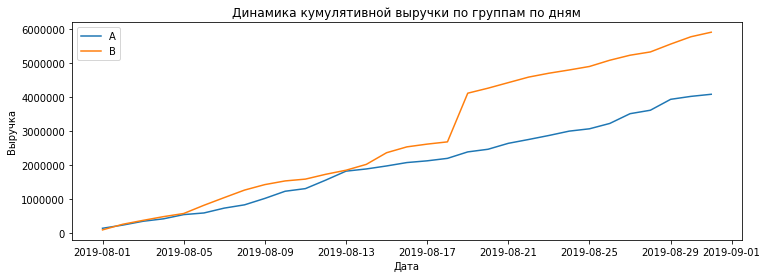

In [13]:
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

fig, ax = plt.subplots(figsize=(12, 4))

plt.plot(data['date'], data['revenueCummulativeA'], label='A')
plt.plot(data['date'], data['revenueCummulativeB'], label='B')

plt.legend() 
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title("Динамика кумулятивной выручки по группам по дням")
plt.show()


Выручка группы А почти равномерно увеличивалась в течение всего теста, но проигрывала выручке группы В после 5 дня теста, за исключением 13 числа, где они сравнялись  и был ее всплеск. 

Выручка группы В равномерно увеличивалась до 19 дня, на 20 день теста она резко выросла и далее продолжила 
Всплески  на графиках выручки обеих групп сигнализируют о росте числа заказов или появлении очень дорогих заказов, что требует дополнительной проверки на аномалии значений выручки как в группе А, так и в группе В для устранения риска неправильного заключения по теста.

<a href = '#section1'>Вернуться к оглавлению</a>
</div>

<a class="ancor" id="step_7"></a>
### График кумулятивного среднего чека по группам 

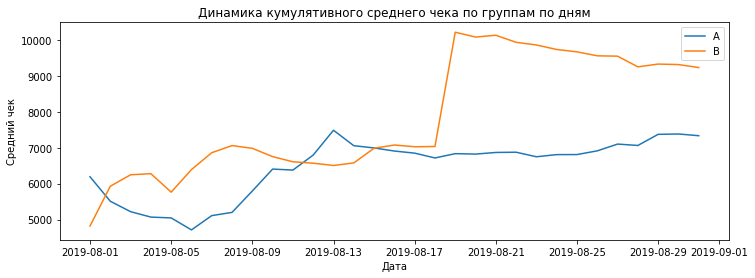

In [14]:
fig, ax = plt.subplots(figsize=(12, 4))

plt.plot(data['date'], data['revenueCummulativeA']/data['ordersCummulativeA'], label='A')
plt.plot(data['date'], data['revenueCummulativeB']/data['ordersCummulativeB'], label='B')

plt.legend() 
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title("Динамика кумулятивного среднего чека по группам по дням")
plt.show()

**ВЫВОД**

Средний чек, так же как и выручка, у группы В выше, чем у группы А на протяжении месяца. Всплески идентичны  графикам выручки: 13 числа для А,  и в районе 18-19 дня - для группы А, что еще раз подтверждает необходимость проверки на аномалии

<a href = '#section1'>Вернуться к оглавлению</a>
</div>

<a class="ancor" id="step_8"></a>
### График относительного изменения кумулятивного среднего чека группы B к группе A

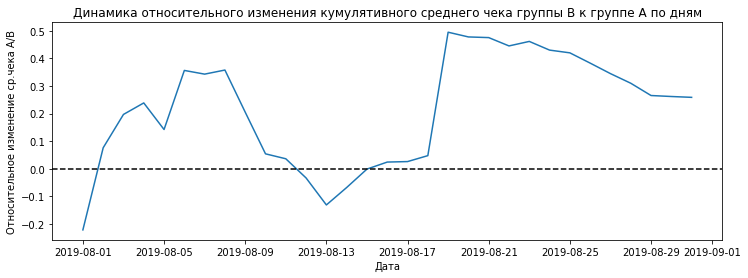

In [15]:
fig, ax = plt.subplots(figsize=(12, 4))

(plt.plot(data['date'],
         (data['revenueCummulativeB']/data['ordersCummulativeB'])/
         (data['revenueCummulativeA']/data['ordersCummulativeA'])-1))

plt.axhline(y=0, color='black', linestyle='--') 

plt.xlabel('Дата')
plt.ylabel('Относительное изменение ср.чека А/В')
plt.title("Динамика относительного изменения кумулятивного среднего чека группы B к группе A по дням")
plt.show()

**ВЫВОД**

Относительный средний чек группы В к А   тоже выше 0  практически все время на прояжении теста (что еще раз свидетельствует об успешности внедрения гипотезы), но подвержен резким колебаниям.  Это также подтверждает вероятность наличия очень дорогих заказов и необходимость выявление покупателей с аномальным поведением.

<a href = '#section1'>Вернуться к оглавлению</a>
</div>

<a class="ancor" id="step_9"></a>
### График кумулятивной конверсии по группам

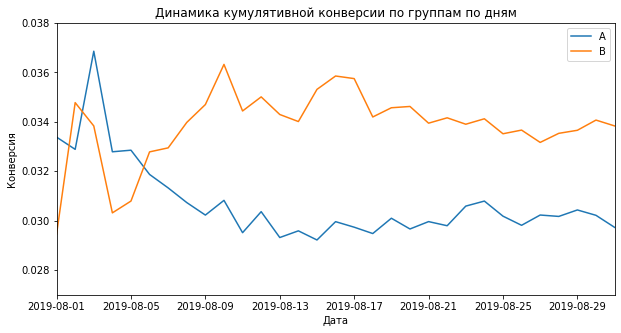

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))


plt.plot(data['date'], data['conversionA'], label='A')
plt.plot(data['date'], data['conversionB'], label='B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.title("Динамика кумулятивной конверсии по группам по дням")
plt.axis(["2019-08-01", '2019-08-31', 0.027, 0.038]) 
plt.show()

**ВЫВОД**

Kонверсия группы B  через 2 дня теста вырвалась, но сразу же просела и отдала свои позиции коверсии группы А. Н на 7 день снова вырвалась вперед и оставалась в лидерах до конца теста.

<a href = '#section1'>Вернуться к оглавлению</a>
</div>

<a class="ancor" id="step_10"></a>
### График относительного изменения кумулятивной конверсии группы B к группе A

['2019-08-01', '2019-08-31', -0.2, 0.3]

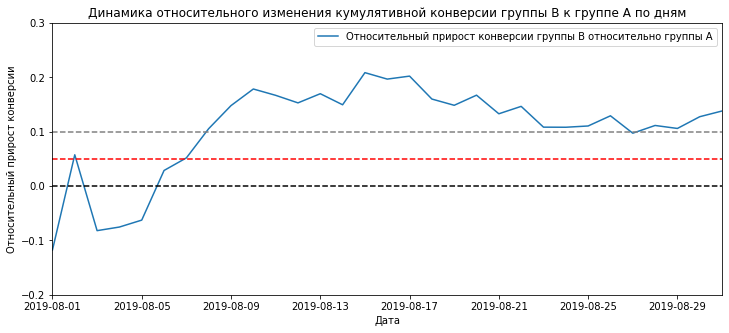

In [17]:
fig, ax = plt.subplots(figsize=(12, 5))

plt.plot(data['date'], (data['conversionB']/data['conversionA']-1), \
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.10, color='grey', linestyle='--')
plt.axhline(y=0.05, color='red', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Относительный прирост конверсии')
plt.title("Динамика относительного изменения кумулятивной конверсии группы B к группе A по дням")

plt.axis(["2019-08-01", '2019-08-31', -0.2, 0.3]) 

<a href = '#section1'>Вернуться к оглавлению</a>
</div>

**ВЫВОД**

В начале теста группа B проигрывала группе A, вырвалась вперёд на 5%, но быстро провалилась снова, но на 7 день отыграла позиции. В период с 6 дня до 11 дня  конверсия группы В росла,  с 15 дня наметилась тенденция к снижению конверсии, но ее величина не опускалась ниже 10%

<a href = '#section1'>Вернуться к оглавлению</a>
</div>

<a class="ancor" id="step_11"></a>
## Анализ выбросов и всплесков: крайние значения данных

<a class="ancor" id="step_12"></a>
### Точечный график количества заказов по пользователям

          userId  orders
1023  4256040402  11    
591   2458001652  11    
569   2378935119  9     
487   2038680547  8     
44    199603092   5     
744   3062433592  5     
55    237748145   5     
917   3803269165  5     
299   1230306981  5     
897   3717692402  5     


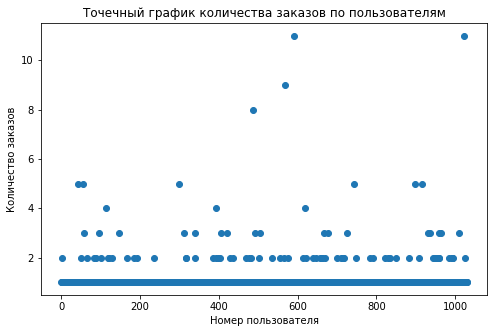

In [18]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False)\
                                                                 .agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['userId','orders']

print(ordersByUsers.sort_values(by='orders',ascending=False).head(10))

x_values = pd.Series(range(0,len(ordersByUsers)))

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(x_values, ordersByUsers['orders'])
plt.xlabel('Номер пользователя')
plt.ylabel('Количество заказов')
plt.title("Точечный график количества заказов по пользователям")

plt.show()

<a href = '#section1'>Вернуться к оглавлению</a>
</div>

<a class="ancor" id="step_13"></a>
### Расчет 95-й и 99-й перцентили количества заказов на пользователя

In [19]:
percentile_ordersByUsers = np.percentile(ordersByUsers['orders'], [95, 99]) 
print('Перцентиль 95: {0:.0f}'.format(percentile_ordersByUsers[0])) 
print('Перцентиль 99: {0:.0f}'.format(percentile_ordersByUsers[1]))

Перцентиль 95: 2
Перцентиль 99: 4


**ВЫВОД**

Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали более 4 раз.Имеет смысл выбрать 2 заказа на одного пользователя за нижнюю границу числа заказов, и "отсеять" аномальных пользователей по ней 

<a href = '#section1'>Вернуться к оглавлению</a>
</div>

<a class="ancor" id="step_14"></a>
### Точечный график стоимостей заказов

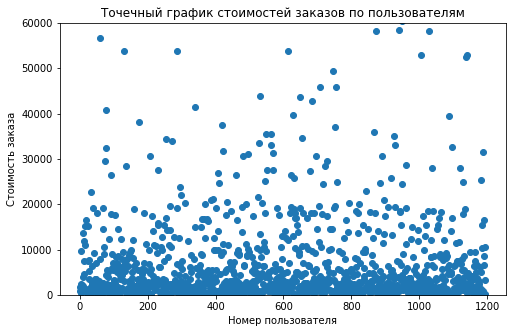

In [20]:
fig, ax = plt.subplots(figsize=(8, 5))

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Номер пользователя')
plt.ylabel('Стоимость заказа')
plt.title("Точечный график стоимостей заказов по пользователям")
plt.ylim([0, 60000])
plt.show()

**ВЫВОД**

Eсть немного дорогих заказов. По графику можно выбрать границу аномальных заказов более 30000. Для уточнения этого предположения расчет доли 1% до 5% стоимостей заказов с крайними значениями.

<a href = '#section1'>Вернуться к оглавлению</a>
</div>

<a class="ancor" id="step_15"></a>
### Рачет 95-й и 99-й перцентили стоимости заказов

In [21]:
percentile_revenue = np.percentile(orders['revenue'], [95, 99])
print('Перцентиль 95: {0:.1f}'.format(percentile_revenue[0])) 
print('Перцентиль 99: {0:.1f}'.format(percentile_revenue[1]))

Перцентиль 95: 28000.0
Перцентиль 99: 58233.2


**ВЫВОД**

Аномальные заказы - это заказы стоимостью более 28000.

<a href = '#section1'>Вернуться к оглавлению</a>
</div>

<a class="ancor" id="step_16"></a>
## Cтатистическую значимость "очищенных" и "сырых" данных 

<a class="ancor" id="step_17"></a>
### Cтатистическую значимость различий в конверсии между группами по «сырым» данным

Составим списки количества заказов для каждого пользователя, в т.ч для пользователей, которые не делали заказы, для каждой группы  sampleA и sampleB

Статистическую значимость различий в конверсии между группами по «сырым»  и очищенным данным будем посредством критерия Манна-Уитни.
За уровень значимости( alpha) примем 0.05.
Н0 - статистически значимых различий в конверсии между группами А и В нет,                                 
Н1 - конверсии между группами А и В статистически значимы                                                          

In [22]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False)\
                                             .agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],\
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),\
                     name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],\
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),\
                     name='orders')],axis=0)

In [23]:
sampleA 

0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18736, dtype: int64

In [24]:
print("Относительный прирост конверсии группы B: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

Относительный прирост конверсии группы B: 0.138


In [25]:
alpha = .05 

results = stats.mannwhitneyu(sampleB, sampleA, alternative = 'two-sided')

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя") 

p-значение:  0.016792355056752608
Отвергаем нулевую гипотезу: разница статистически значима


**ВЫВОД**

Относительный прирост конверсии группы B равен 13,8%. Конверсии между группами А и В статистически значимы.

p-value = 0.008 значительно меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами А и В нет, отвергаем.  

<a href = '#section1'>Вернуться к оглавлению</a>
</div>

<a class="ancor" id="step_18"></a>
### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Н0 - статистически значимых различий в среднем чеке между группами А и В нет                                  
Н1 - средний чек между группами А и В различен   

In [26]:
print("p-value: {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],\
                        orders[orders['group']=='B']['revenue'])[1], alternative = 'two-sided'))
print("Относительная разница в среднем чеке: {0:.3f}".format(orders[orders['group']=='B']['revenue']\
                                            .mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.365
Относительная разница в среднем чеке: 0.259


P-value равна 0,365, что значительно больше 0.05. Значит, причин отвергать нулевую гипотезу об отсутствии различий средних чеков заказов группы А и В нельзя.

В действительности, рассчитанный по "сырым" данным  средний чек группы B, выше среднего чека группы A на 25,9 %. Необходим расчет по очищенным данным.

<a href = '#section1'>Вернуться к оглавлению</a>
</div>

<a class="ancor" id="step_19"></a>
### Статистическая значимость различий в конверсии между группами по «очищенным» данным

In [27]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],\
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates()\
                                                                                                     .sort_values()

print("Количество аномальных пользователей: {}".format(len(abnormalUsers)))

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId']\
                  .isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() -\
                len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId']\
                  .isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() -\
                  len(ordersByUsersB['orders'])),name='orders')],axis=0)

print("p-value: {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1], alternative = 'two-sided'))
print("Относительный прирост конверсии группы B: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

Количество аномальных пользователей: 74
p-value: 0.007
Относительный прирост конверсии группы B: 0.173


**ВЫВОД**

Относительный прирост конверсиимежду группами В и А по очищенных данным вырос до 17,3 8%. Конверсии между  группами В и А статистически значимы, как и в случае "сырых" данных. Это весомый аргумент для принятия решения 1. Остановить тест, зафиксировать победу группы В.

<a href = '#section1'>Вернуться к оглавлению</a>
</div>

<a class="ancor" id="step_20"></a>
### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [28]:
print("p-value: {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1], alternative = 'two-sided'))

print("Относительная разница в среднем чеке: {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

p-value: 0.369
Относительная разница в среднем чеке: -0.020


**ВЫВОД**

После очистки данных относительная разница в среднем чеке между группами В и А минимизировалась и стала 2 %.  

Нулевая гипотеза  не отвергается: статистически значимых отличий в средних чеках групп нет.

<a href = '#section1'>Вернуться к оглавлению</a>
</div>

<a class="ancor" id="step_21"></a>
## Решение по результатам теста 

Из вариантов решений: 
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест                                                                                                 
целесообразно остановиться на **ПЕРВОМ** варианте, несмотря на то, что разница между средними чеками групп А и В составляет всего 2 %.
Кумулятивные метрики по выручке,среднему чеку и конверсии группы В были выше, чем у группы А, практически на всем протяжении теста.
Разница показателей конверсий между группами  до и после удаления аномалий  является статистически значимой.

<a href = '#section1'>Вернуться к оглавлению</a>
</div>

<a class="ancor" id="step_22"></a>
# Общий вывод

1.  Для достижения первой цели проекта *"Приоритизировать гипотезы по увеличению выручки интернет-магазина, разработанные с отделом маркетинга"* в нашем распоряжении были данные по 4 факторам, влияющим на оценку и  расстановку приоритета гипотезы: Reach (охват), Impact (влияние), Confidence (уверенность в вашей оценке охвата, влияния и трудозатрат), Effort(трудозатраты). Оценки факторов были приведены по 10 балльной шкале, данные были корректны и не требовали обработки для дальнейшего анализа.Это дало возможность дать оценку  девяти гипотез, расчитав фрейморки ICE и RICE.                                                                                    
ТОП-5 гипотез по обоим фрейморкам совпали. Ими оказались:                                                          
для ICE:  8, 0, 7, 6, 2                                                                                             
для RICE: 7, 2, 0, 6, 8.                                                                                           
Целесообразно признать **гипотезы 7, 2, 0 для более быстрого тестирования наиболее приоритетными**, т.к. их ранг  был получен  с учетом охвата пользователей интернет-магазина.                                                          



2. Для достижения 2 цели проекта "Запустить A/B-тест и проанализировать результаты" были проанализированы данные  по факту посещения, заказам, среднему чеку (выручке) по дням в течении месяца (31 дня). В целом, данные были корректны для анализа , потребовалась лишь замена типа данных в столбцах, содержащих дату, со строчного на временной.                                                                                                         
Для принятия решения по результатам теста были построены графики по кумулятивным бизнес-метрикам, выявлены покупатели с "аномальным" поведением, и проверены гипотезы о статистической значимости показателей конверсии и среднего чека между группами В и А для "сырых" и отфильтрованных данных критерием Манна-Уитни.
Кумулятивные метрики по выручке, среднему чеку и конверсии, в том числе и относительные, были выше в группе В. Но резкие колебания на графиках бизнес-метрик, особенно среднего чека, указывали  на наличие аномалий, что не позволяло признать победу группы В в тестировании на основании только бизнес-метрик.                              
Точечные графики стоимостей и количества заказов подтвердили  наше предположение. Расчетом 95-перцентили  были установлены нижние границы нормы: не более 2 заказов -количество заказов, не более 28000 - средний чек.            
Рассчитанный по "сырым" данным средний чек группы B был выше среднего чека группы A на 25,9 %. Критерий Манна-Уитни,наоборот, говорил, что отвергать нулевую гипотезу: "Статистически значимых отличий в средних чеках групп нет", - мы не можем.  И, действительно, после фильтрации аномалий относительная разница в среднем чеке между группами В и А минимизировалась и стала 2 %.                                                                       
Но несмотря на это целесообразно принять решение 1: **"Остановить тест, зафиксировать победу группы В"**.Так как
разница показателей конверсий между группами до и после удаления аномалий является статистически значимой и составляет 13,8 и 17,3 %, соответственно.                                                                          